In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [2]:
# Load the preprocessed data
X_train = pd.read_csv('X_train.csv', index_col=0)
X_test = pd.read_csv('X_test.csv', index_col=0)
y_train = pd.read_csv('y_train.csv', index_col=0)
y_test = pd.read_csv('y_test.csv', index_col=0)

In [3]:
# Reshape input data for LSTM (samples, time steps, features)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [4]:
# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, X_train.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

In [5]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
349/349 [==============================] - 4s 4ms/step - loss: 0.0183 - val_loss: 0.0096
Epoch 2/50
349/349 [==============================] - 1s 3ms/step - loss: 7.0454e-04 - val_loss: 4.4645e-04
Epoch 3/50
349/349 [==============================] - 1s 3ms/step - loss: 5.0614e-04 - val_loss: 4.7673e-04
Epoch 4/50
349/349 [==============================] - 1s 3ms/step - loss: 4.9823e-04 - val_loss: 3.5511e-04
Epoch 5/50
349/349 [==============================] - 1s 3ms/step - loss: 4.7280e-04 - val_loss: 3.8663e-04
Epoch 6/50
349/349 [==============================] - 1s 3ms/step - loss: 4.7281e-04 - val_loss: 4.0021e-04
Epoch 7/50
349/349 [==============================] - 1s 3ms/step - loss: 4.7576e-04 - val_loss: 3.7052e-04
Epoch 8/50
349/349 [==============================] - 1s 3ms/step - loss: 4.6856e-04 - val_loss: 3.5137e-04
Epoch 9/50
349/349 [==============================] - 1s 3ms/step - loss: 4.6485e-04 - val_loss: 4.1820e-04
Epoch 10/50
349/349 [===============

In [6]:
# Make predictions
predictions = model.predict(X_test)

109/109 [==============================] - 1s 3ms/step


In [7]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.00020478184311924612
Mean Absolute Error: 0.010257819301366844
Root Mean Squared Error: 0.014310200666630994


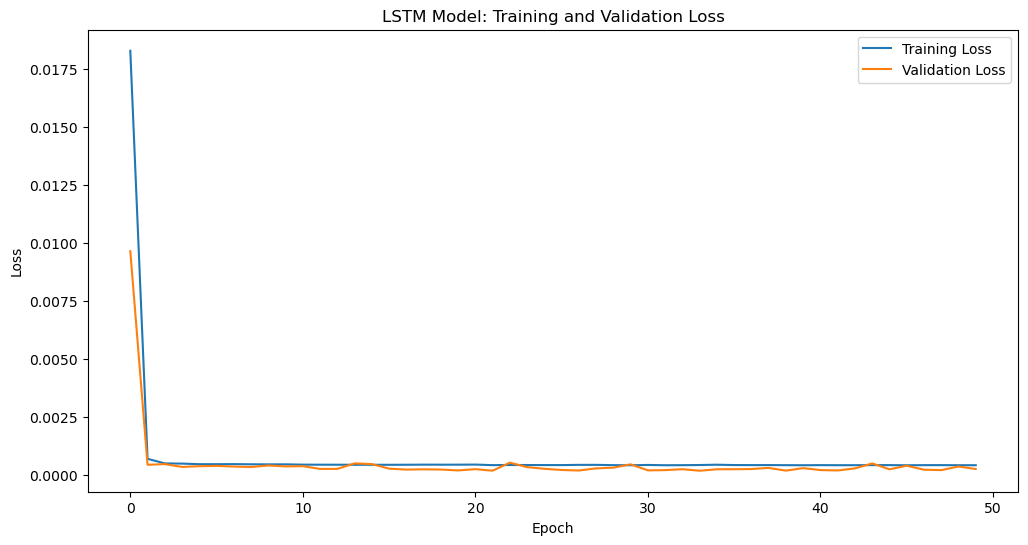

In [8]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model: Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

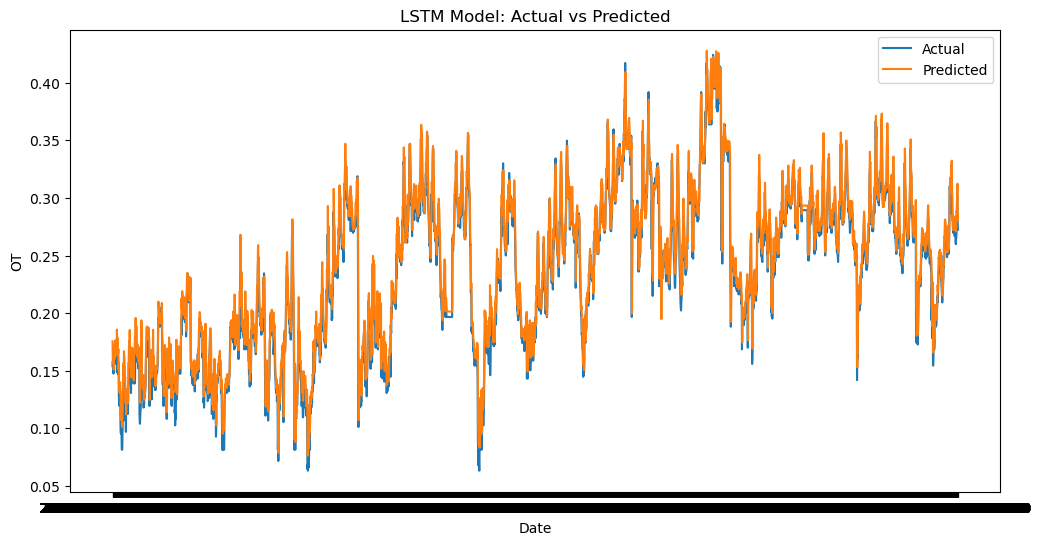

In [9]:
# Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, predictions, label='Predicted')
plt.title('LSTM Model: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('OT')
plt.legend()
plt.show()